In [139]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from scipy import stats

### Задача № 1

In [146]:
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

df = pd.DataFrame(X).rename({0:'X1', 1:'X2', 2:'X3', 3:'X4'}, axis='columns')

y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [147]:
list_col = df.columns.tolist()
max_R2 = 0
beast_f = []

for i in range(len(list_col)):
    for j in range(i+1, len(list_col)):
        
        x2 = df[[list_col[i], list_col[j]]]
        ones = np.ones((x2.shape[0], 1)) 
        x2 = np.hstack((ones, x2)) ### добавляю столбец из "1" для кор.расчета const. b0
        XTX_2 = x2.T.dot(x2) ### транспонирование и умножение на первонач.матрицу
        np.linalg.det(XTX_2) ### определитель матрицы
        XTX_inv_2 = np.linalg.inv(XTX_2) ### обратная матрица
        b = XTX_inv_2.dot(x2.T).dot(y) ## расчет вектора b = обр.матрица * трансп. матрицу * y
        z2 = x2.dot(b) ## матрица * коэф.вектора
        def sum_of_squares(samples):
            return ((samples - samples.mean()) ** 2).sum() ## сумма квадратов отклонений значений массива y от среднего

        R2 = 1 - ((y - z2)**2).sum() / sum_of_squares(y)
        if R2 > max_R2:
            max_R2 = round(R2, 6)
            beast_f = list_col[i], list_col[j]
            
        print('При', list_col[i],'&', list_col[j], 'R2 =', round(R2, 3))
   
        
print('Наилучший результат при', '&'.join(beast_f), ', R2 = ', max_R2)

При X1 & X2 R2 = 0.181
При X1 & X3 R2 = 0.763
При X1 & X4 R2 = 0.453
При X2 & X3 R2 = 0.548
При X2 & X4 R2 = 0.606
При X3 & X4 R2 = 0.622
Наилучший результат при X1&X3 , R2 =  0.763425


In [148]:
### значимость уравнения регрессии
x2 = df[['X1', 'X3']].values
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

##### Критическая область:

In [149]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

In [150]:
F = (max_R2 / k1) / ((1 - max_R2) / k2)
F

11.294462643981825

In [152]:
### т.к. F-критерий попал в критическую область => гипотеза о незначимости отвергается, 
###  уравнение регрессии признаётся значимым

### Задача № 2

In [176]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) ### признак
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) ## целевая переменная

In [177]:
### коэффициенты линейной регрессии с помощью формулы для парной регрессии

b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

In [178]:
### коэффициенты линейной регрессии с помощью метода наименьших квадратов
x_salary = pd.DataFrame(salary)[[0]].values
ones = np.ones((x_salary.shape[0], 1))
x_salary = np.hstack((ones, x_salary))
x_salary

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [179]:
XTX = x_salary.T.dot(x_salary)

np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_salary.T).dot(scoring)

print(b)

[444.17735732   2.62053888]


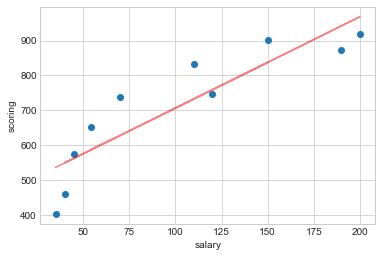

In [180]:
### Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [181]:
### Коэффициент детерминации
z1 = b0 + b1 * salary
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

R1 = 1 - ((scoring - z1)**2).sum() / sum_of_squares(scoring)
R1

0.7876386635293686

In [182]:
### Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
n = salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [186]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
F = (R1 / k1) / ((1 - R1) / k2)
print('Критическая область:', round(t, 4))
print('F-критерий Фишера:', round(F, 4))

Критическая область: 5.3177
F-критерий Фишера: 29.6716


In [187]:
### Статистика попала в критическую область, уравнение регрессии признаётся значимым.

In [190]:
### (доп) Посчитать среднюю ошибку аппроксимации
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

mean_approximation_error(scoring, z1)

0.11469251843561709

In [ ]:
### средняя ошибка аппроксимации > 10% , говорит о том, что теоретические значения отличаются,
## от тех которые выдает модель линейной регрессии.